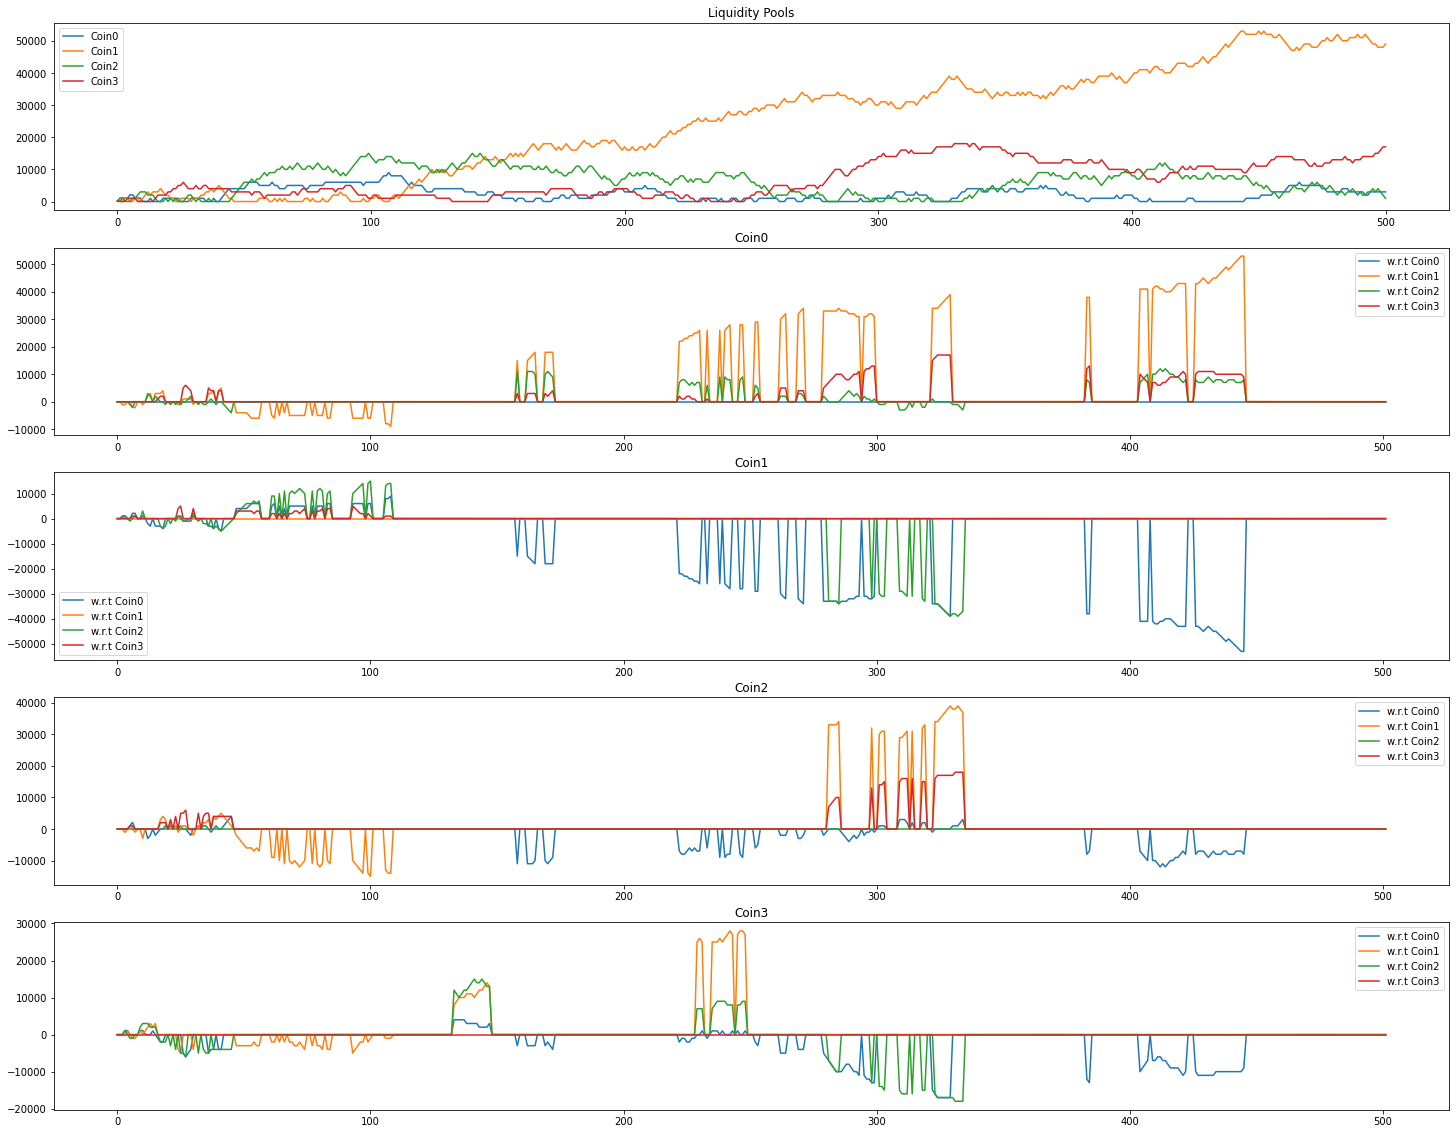

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

txCount = 500

xaxis = np.arange(0,txCount + 1,1, dtype=int)

# data points
liquidityPools = np.array([[100,100,100,100]])
user1Balances = np.array([[100,100,100,100]])
user2Balances = np.array([[100,100,100,100]])

for x in range(txCount): # do trade 
    amount = 1000
    choice = random.randint(1, 6) 
    if choice == 1:  
        fromPool = 0  
        toPool = 1 
    elif choice == 2:  
        fromPool = 1  
        toPool = 2 
    elif choice == 3:  
        fromPool = 2  
        toPool = 3 
    elif choice == 4:  
        fromPool = 3  
        toPool = 2 
    elif choice == 5:  
        fromPool = 2  
        toPool = 1 
    elif choice == 6:  
        fromPool = 1  
        toPool = 0 

    newPools = np.array(liquidityPools[x]) 
    newuser1Balances = np.array(user1Balances[x]) 
    newuser2Balances = np.array(user2Balances[x])
    newPools[fromPool] += amount 
    newuser1Balances[fromPool] -= amount 
    newPools[toPool] -= amount 
    newuser1Balances[toPool] += amount 
    
    # donot allow below 0 
    newPools = newPools.clip(min=0) 
    
    newuser1Balances = newuser1Balances.clip(min=0) 
    newuser2Balances = newuser2Balances.clip(min=0)
    
    liquidityPools = np.append(liquidityPools,np.array([newPools]),axis=0) 
    user1Balances = np.append(user1Balances,np.array([newuser1Balances]),axis=0) 
    user2Balances = np.append(user2Balances,np.array([newuser2Balances]),axis=0)


fig,axs = plt.subplots(5)
fig.set_figwidth(25)
fig.set_figheight(20)
axs[0].set_title("Liquidity Pools")
axs[0].plot(xaxis,liquidityPools[:,0],label="Coin0")
axs[0].plot(xaxis,liquidityPools[:,1],label="Coin1")
axs[0].plot(xaxis,liquidityPools[:,2],label="Coin2")
axs[0].plot(xaxis,liquidityPools[:,3],label="Coin3")
axs[0].legend()

# new axis
xaxis = np.arange(0,txCount + 2,1, dtype=int)

# calculate and plot price variations for a single coin w.r.t others
# price formula (AMM): price of A w.r.t B = pool of B / pool of A
for coin in range(4): 
    prices = np.array([[1.0,1.0,1.0,1.0]])
    for tx in liquidityPools:  
        if tx[coin] <= 0:
            tx[coin] = 1
        if tx[0] <= 0:
            tx[0] = 1
        if tx[1] <= 0:
            tx[1] = 1
        if tx[2] <= 0:
            tx[2] = 1
        if tx[3] <= 0:
            tx[3] = 1

        # calculate ratios individually
        # reverse sign to show ration in reverse i.e if denominator > numerator
        if tx[coin] > tx[0]:
            ratio1 = -tx[coin]/tx[0]
        else:
            ratio1 = tx[0]/tx[coin]
        
        if tx[coin] > tx[1]:
            ratio2 = -tx[coin]/tx[1]
        else:
            ratio2 = tx[1]/tx[coin]

        if tx[coin] > tx[2]:
            ratio3 = -tx[coin]/tx[2]
        else:
            ratio3 = tx[2]/tx[coin]

        if tx[coin] > tx[3]:
            ratio14 = -tx[coin]/tx[3]
        else:
            ratio4 = tx[3]/tx[coin]

        newprices = [ratio1,ratio2,ratio3,ratio4]  
        # print(newprices)  
        
        prices = np.append(prices,np.array([newprices]),axis=0)
    
    axs[coin + 1].set_title("Coin" + str(coin)) 
    axs[coin + 1].plot(xaxis,prices[:,0],label="w.r.t Coin0") 
    axs[coin + 1].plot(xaxis,prices[:,1],label="w.r.t Coin1") 
    axs[coin + 1].plot(xaxis,prices[:,2],label="w.r.t Coin2") 
    axs[coin + 1].plot(xaxis,prices[:,3],label="w.r.t Coin3") 
    axs[coin + 1].legend()